# The Best-Reply Graph of the Multi-stage Prisoner's Dilemma (Problem from AY'17 Paper)

In [1]:
import itertools
import numpy as np
from tqdm import tqdm

## Game parameters

In [2]:
def get_initial_state():
    # initial state distribution
    return np.random.choice(range(n_states)) # uniform over states for now 

In [3]:
def create_cost_func(cost_matrix, i):
    '''create a cost function : X, U -> cost from `cost_matrix`'''
    # TODO: fix. cost depends only on 
    
    def cost_func(x, us):
        u = us[i]
        return cost_matrix[x,u]

    return cost_func

In [4]:
a, b, c = -1, 2, 1
reward_matrix = np.array([[c, a],[b, 0]])

def reward0(state, actions):
    ui, u_i = actions
    return reward_matrix[ui, u_i]
def reward1(state, actions):
    u_i, ui = actions
    return reward_matrix[ui, u_i]

reward_funcs = [reward0, reward1]

In [5]:
def transition_state(x, us):
    '''returns next state given current state and action'''
    gamma = 0.3

    if us == [0,0]:
        if np.random.random() < 1 - gamma:
            return 0
        else:
            return 1
    else:
        if np.random.random() < 1 - gamma:
            return 1
        else:
            return 0

In [6]:
r = 0.751 # 0.51
def calc_alpha(n):
    return 1/(n**r)

In [7]:
n_states = 2 # number of states
n_agents = 2 # number of agents

n_Us = [2] * n_agents # number of actions per agent (both agents have two actions)

experimentation_probs = [0.1]*n_agents # probability of experimentation at each action (\rho)
inertias = [0.5] * n_agents # inertias of each agent (\lambda)
betas = [0.9]*n_agents # discount factor
deltas = [0]*n_agents # (in paper it's 0) [this is critical; does T depend on this?]
n_exploration_phases = 100 # number of exploration phases
T = 1000 # length of exploration phase

### Run Simulation

In [8]:
from multi_agent_learning import q_learning_alg1

In [9]:
Qs, agent_policies, (policy_history, Qs_history, is_BR_history) = q_learning_alg1(n_Us, n_states, reward_funcs, betas,
                                                                    get_initial_state, transition_state, 
                                                                    n_exploration_phases, T, experimentation_probs,
                                                                    calc_alpha, deltas, inertias)

100%|█████████████████████████████████████████████████████████| 100/100 [00:10<00:00,  9.95it/s]


In [10]:
Qs

[array([[-0.49012455,  0.62030387],
        [-0.28299234,  0.64540712]]),
 array([[-0.37323041,  0.78524788],
        [-0.14299502,  0.79073082]])]

In [11]:
agent_policies

[(1, 1), (1, 1)]

## Learn BR Graph

In [12]:
from br_graph_analysis import learn_br_graph

In [13]:
init_state = 0
T = 10000 # length of exploration phase
experimentation_probs = [0.01]*n_agents # probability of experimentation at each action (\rho)
deltas = [1e-5]*n_agents # (in paper it's 0) [this is critical; does T depend on this?]

In [14]:
br_graph = learn_br_graph(n_agents, n_states, n_Us, init_state, transition_state, reward_funcs, betas,
                  T, experimentation_probs, calc_alpha, deltas)

100%|███████████████████████████████████████████████████████████| 16/16 [00:18<00:00,  1.13s/it]


In [15]:
import networkx as nx
import matplotlib.pyplot as plt

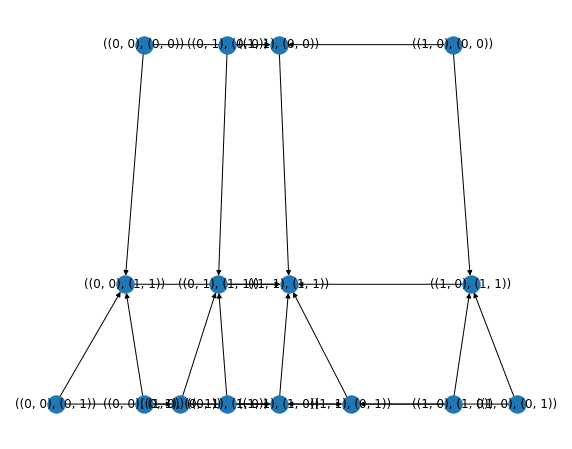

In [16]:
# draw BR graph (without self-loops)
br_graph_ = nx.DiGraph.copy(br_graph)
br_graph_.remove_edges_from(nx.selfloop_edges(br_graph_))
fig, ax = plt.subplots(figsize=(10,8))
nx.draw_spectral(br_graph_, with_labels=True, ax=ax)

In [17]:
[node for node in br_graph_.nodes if br_graph_.out_degree(node) == 0]

[((1, 1), (1, 1))]

interesting. only one equilibrium found. supposed to be two? is there a mistake in the algorithm? or is it a numerical mistake due to the high sensitivity of the game set up?